# Preferensi Penumpang dan Dampak Faktor Eksternal Terhadap Perjalanan di Beberapa Titik Lokasi Pengantaran.

Sebagai seorang analyst untuk Zuber, sebuah perusahaan berbagi tumpangan (ride-sharing) baru yang diluncurkan di Chicago. Tugasmu adalah untuk menemukan pola pada informasi yang tersedia. Kamu ingin memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan.

Dengan menggunakan database, kamu akan menganalisis data dari kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan. 

Tujuan :
   - Mengetahui preferensi penumpang terhadap layanan berbagi tumpangan (ride-sharing) pada setiap perusahaan dan titik lokasi pengantaran.
   - Mengetahui preferensi penumpang terhadap dampak faktor eksternal pada waktu cuaca baik (good) dan buruk (bad).

Kerangka Konsep :
   1. Mempersiapkan Data
   2. Memperbaiki data
   3. Menganalisis data
   4. Menguji Hipotesis Statistik
   5. Kesimpulan umum

## Deskripsi Data

Dataframe `1` memuat:
   - `company_name` — nama perusahaan taksi
   - `trips_amount` — jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017

Dataframe `2` memuat:
   - `dropoff_location_name` — nama wilayah di Chicago tempat perjalanan berakhir
   - `average_trips` — jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.

Dataframe `3` memuat:
   - `start_ts` — tanggal dan waktu penjemputan
   - `weather_conditions` — kondisi cuaca saat perjalanan dimulai
   - `duration_seconds` — durasi perjalanan dalam satuan detik

## Inisialisasi Library

Memuat library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Memuat data yang terdapat 3 tabel terpisah

In [2]:
df1 = pd.read_csv('/datasets/project_sql_result_01.csv')
df2 = pd.read_csv('/datasets/project_sql_result_04.csv')
df3 = pd.read_csv('/datasets/project_sql_result_07.csv')

## Mengenal Data

### Data 1

Melihat informasi data serta sample datanya untuk mencari tahu adanya anomali data

Pada data 1 memiliki total baris berjumlahkan 64 data. Memiliki kolom company_name, dan trips_amount.

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df1.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Mencari tahu lebih dalam soal permasalahan dengan data duplikat dan data missing.

In [5]:
df1.duplicated().sum()

0

In [6]:
report_null_df1 = df1.isnull().sum().to_frame()
report_null_df1 = report_null_df1.rename(columns={0:'missing_values'})
report_null_df1['% of total'] = (report_null_df1['missing_values'] / df1.shape[0]).round(2)
report_null_df1.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
company_name,0,0.0
trips_amount,0,0.0


### Data 2

Melihat informasi dan sample dari data apakah ada masalah yang perlu di perbaiki.

Terlihat pada data 2 memiliki total baris berjumlahkan 94 data. Memiliki kolom dropoff_location_name, dan average_trips.

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
df2.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Mencari tahu lebih dalam soal permasalahan dengan data duplikat dan data missing.

In [9]:
df2.duplicated().sum()

0

In [10]:
report_null_df2 = df2.isnull().sum().to_frame()
report_null_df2 = report_null_df2.rename(columns={0:'missing_values'})
report_null_df2['% of total'] = (report_null_df2['missing_values'] / df2.shape[0]).round(2)
report_null_df2.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
dropoff_location_name,0,0.0
average_trips,0,0.0


### Data 3

Melihat informasi dan sample data untuk mengetahui masalah yang ada.

Data 3 memiliki total baris berjumlahkan 1068 data. Memiliki kolom start_ts, weather_conditions, dan duration_seconds. Pada kolom start_ts memiliki tipe data yang tidak sesuai untuk kolom yang seharusnya menunjukkan waktu (datetime).

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [12]:
df3.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


Mencari tahu lebih dalam soal permasalahan dengan data duplikat dan data missing

Terlihat pada tabel data memiliki sejumlah 197 data duplikat

In [13]:
df3.duplicated().sum()

197

In [14]:
report_null_df3 = df3.isnull().sum().to_frame()
report_null_df3 = report_null_df3.rename(columns={0:'missing_values'})
report_null_df3['% of total'] = (report_null_df3['missing_values'] / df3.shape[0]).round(2)
report_null_df3.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
start_ts,0,0.0
weather_conditions,0,0.0
duration_seconds,0,0.0


## Memperbaiki Data

Pada data 3 yang memiliki data duplikat akan kita eliminasi menggunakan drop duplikat.

In [15]:
df3 = df3.drop_duplicates()

In [16]:
df3.duplicated().sum()

0

Mengubah tipe data pada kolom average_trips di data 2 dengan integer. Beserta pada data 3 di kolom start_ts akan kita ubah tipe datanya menjadi tipe data datetime.

In [17]:
df2['average_trips'] = df2['average_trips'].astype('int')

In [18]:
df3['start_ts'] = pd.to_datetime(df3['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [19]:
df3.dtypes

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object

## Menganalisis Data

### Pemrofilan Perusahaan dan Lokasi Pengantaran

Bikin variabel baru top_company untuk mencari tahu top 10 perusahaan yang paling sering di gunakan oleh penumpang.

In [20]:
top_company = df1.sort_values(by='trips_amount', ascending=False)[:10]
top_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


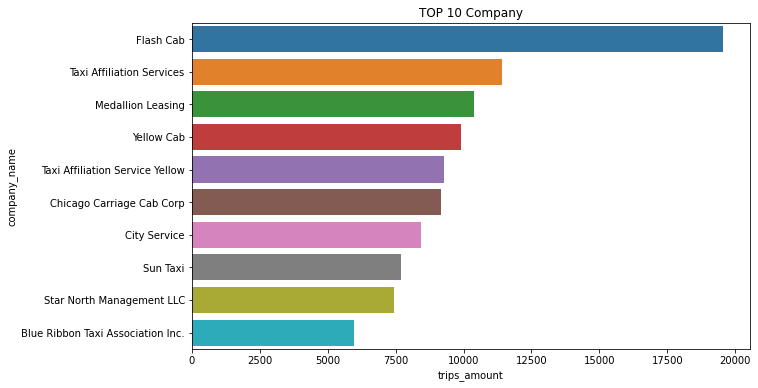

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_company, x='trips_amount', y='company_name')
plt.title('TOP 10 Company')
plt.show()

TOP 10 Company:
   - Flash Cab yang menduduki peringkat paling atas dengan perolehan nilai 19558
   - Peringkat ke-10 di duduki oleh Blue Ribbon Taxi Association Inc dengan nilai 5953
   - Perbedaan nilai dari setiap perusahaan tidak berbeda terpaut jauh yang mengindikasikan penumpang menggunakan layanan tidak hanya fokus pada satu perusahaan. Berbeda dengan Flash cab saja yang memiliki nilai yang terpaut jauh lebih unggul dari lainnya.

Membuat variabel baru top_dropoff untuk mencari tahu top 10 titik lokasi yang paling sering di kunjungi oleh penumpang.

In [22]:
top_dropoff = df2.sort_values(by='average_trips', ascending=False)[:10]
top_dropoff

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


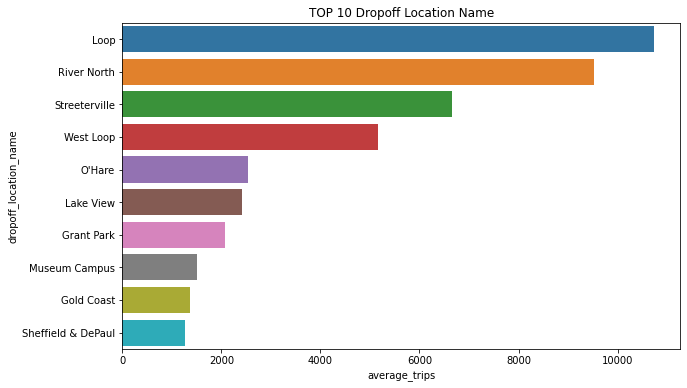

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_dropoff, x='average_trips', y='dropoff_location_name')
plt.title('TOP 10 Dropoff Location Name')
plt.show()

TOP 10 Location Dropoff:
   - Loop yang menduduki peringkat ke-1 dengan perolehan nilai 10727
   - Peringkat ke-10 di duduki oleh Sheffield & DePaul dengan nilai 1259
   - Perbedaan nilai dari setiap lokasi dropoff cukup signifikan, ini mengindikasikan lokasi seperti loop, River North, Streeterville, dan West Loop merupakan daerah pusat kota yang dimana tempatnya ramai dan paling sering dikunjungi penumpang.

### Identifikasi Faktor Eksternal

Mencari tahu dampak dari faktor eksternal seperti cuaca baik atau buruk terhadap durasi waktu yang di habiskan pada peta perjalanan secara individu

In [24]:
df3

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0


Memastikan bahwa tanggal pada kolom start_ts hanyalah waktu yang menunjukkan di hari Sabtu saja. Terlihat nilainya hanya menunjukkan angka 5 yang mengindikasikan pada pengindeksan hari yaitu hari Sabtu.

In [25]:
df3['start_ts'].dt.weekday.value_counts()

5    871
Name: start_ts, dtype: int64

Nilai pada kolom weather_conditions juga sudah sesuai yang dimana hanya memiliki nilai Good dan Bad saja yang mengindikasikan cuaca baik dan buruk.

In [26]:
df3['weather_conditions'].value_counts()

Good    723
Bad     148
Name: weather_conditions, dtype: int64

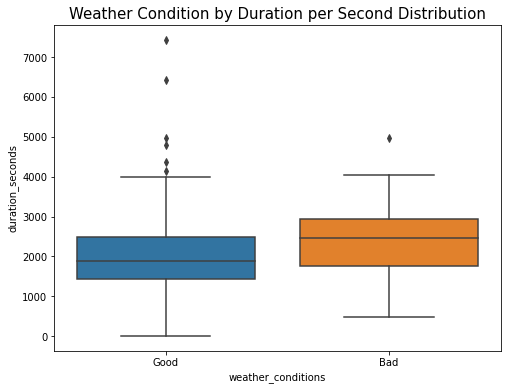

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df3, x='weather_conditions', y='duration_seconds')
plt.title('Weather Condition by Duration per Second Distribution', fontsize=15)
plt.show()

Terlihat pada grafik boxplot baik dari nilai Good maupun Bad masih memiliki nilai outlier. Oleh karna itu kita akan ubah nilai outliernya kedalam nilai ambang batas atas dari median untuk tiap nilai outliernya.

In [28]:
def upper_lower_whisker(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    whisker_upper = 1.5*IQR + Q3
    whisker_lower = Q1 - 1.5*IQR
    return whisker_upper, whisker_lower

def remove_outlier(dataframe, column):
    upper, lower = upper_lower_whisker(dataframe[column])
    dataframe = dataframe[(dataframe[column] < upper) & (dataframe[column] > lower)]
    upper_check, lower_check = upper_lower_whisker(dataframe[column])
    
    if lower == lower_check or upper == upper_check:
        return dataframe
    else:
        dataframe = remove_outlier(dataframe=dataframe, column=column)
        return dataframe

Setelah membuat fungsi, baru dapat kita aplikasikan kedalam dataframe. Sebelum itu kita buat variabel baru yang akan kita bagi menjadi good_weather dan bad_weather agar memudahkan pengamatan.

In [29]:
good_weather = df3.loc[df3['weather_conditions']=='Good']
good_weather = remove_outlier(dataframe=good_weather, column='duration_seconds')

In [30]:
bad_weather = df3.loc[df3['weather_conditions']=='Bad']
bad_weather = remove_outlier(dataframe=bad_weather, column='duration_seconds')

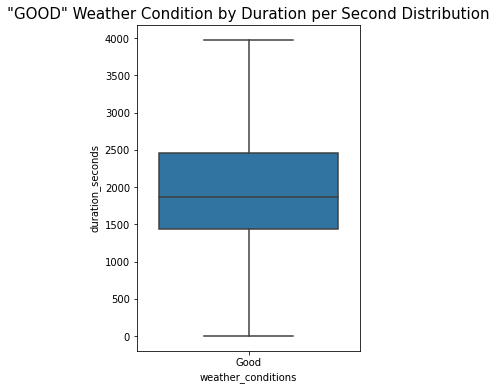

In [31]:
plt.figure(figsize=(4, 6))
sns.boxplot(data=good_weather, x='weather_conditions', y='duration_seconds')
plt.title('"GOOD" Weather Condition by Duration per Second Distribution', fontsize=15)
plt.show()

good_weather:
   - Grafik boxplot menunjukkan range nilai dari 0-4000 poin.
   - Persebaran nilai cukup merata dimana nilai mediannya di angka 1900.

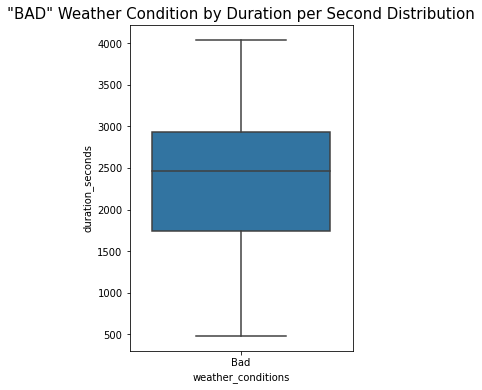

In [32]:
plt.figure(figsize=(4, 6))
sns.boxplot(data=bad_weather, x='weather_conditions', y='duration_seconds')
plt.title('"BAD" Weather Condition by Duration per Second Distribution', fontsize=15)
plt.show()

bad_weather:
   - Grafik boxplot menunjukkan range nilai dari 500-4000 poin.
   - Persebaran nilai cukup merata dimana nilai mediannya di angka 2500.

## Menguji Hipotesis

Masuk ke tahap uji hipotesis dimana data yang kita uji berdasarkan pada data good_weather dan bad_weather. Pengujian di dasarkan pada H0 yang menunjukkan bahwa nilai rata-rata durasi perjalanan disaat cuaca baik ataupun buruk yaitu sama, dan untuk H1 / Ha berlaku sebaliknya dari H0. Uji yang kita gunakan menggunakan 2 sample test independen.

Uji Statistik : Two sample t-test independent

Hipotesis :
   - H0 = Apabila rata-rata durasi perjalanan saat cuaca GOOD dan BAD yaitu Sama
   - Ha = Apabila rata-rata durasi perjalanan saat cuaca GOOD dan BAD yaitu Tidak Sama
   
Alpha : 5% / 0.05

In [33]:
from scipy import stats as st

good = good_weather['duration_seconds']
bad = bad_weather['duration_seconds']

alpha = 0.05

results = st.ttest_ind(good, bad, equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak bisa menolak hipotesis nol")
print()
print('Rata-rata durasi perjalanan saat Cuaca Baik adalah', good.mean())
print('Rata-rata durasi perjalanan saat Cuaca Tidak Baik adalah', bad.mean())

p-value:  1.195557067050947e-08
Kita menolak hipotesis nol

Rata-rata durasi perjalanan saat Cuaca Baik adalah 2004.4058577405858
Rata-rata durasi perjalanan saat Cuaca Tidak Baik adalah 2391.7414965986395


Analisis statistik menunjukkan bahwa :
  - P-Value Rata-rata Durasi Perjalanan saat Cuaca Baik ataupun Buruk adalah 0.119-05%
  - Kita menolak H0, yang mengindikasikan rata-rata saat Cuaca Baik dan Buruk Tidak Sama

Hasil analisis menunjukkan rata-rata saat Cuaca Baik dan Buruk Tidak Sama. Dimana nilai rata-rata saat cuaca sedang baik durasi yang di habiskan selama 2004.4 detik atau 33 menit bilai di konversikan satuannya. Sedangkan untuk nilai rata-rata saat cuaca sedang tidak baik durasi yang di habiskan selama 2391.7 detik atau 39 menit. Perbedaan rata-ratanya tidak terpaut jauh dan juga mengingat jumlah data pada good_weather lebih banyak daripada bad_weather sehingga memperjelas asumsi bahwa kondisi cuaca sangat mempengaruhi preferensi penumpang.

## Kesimpulan Umum

Diawali dengan inisialisasi library menggunakan pandas, matplotlib, seaborn, dan scipy.stats. Datasetnya sendiri terdiri dari df1, df2 dan df3 yang masing-masing memiliki jumlah total baris 64, 94, dan 1068. Beserta kolomnya yang dari df1 yaitu 'company_name', dan 'trips_amount'. Kemudian dari df2 yaitu 'average_trips', dan 'dropoff_location_name'. Lalu untuk df3 yaitu 'start_ts', 'weather_conditions', dan 'duration_second'.

Memperbaiki data :
   - Mengubah tipe data pada kolom average_trips di data 2 dengan integer. Begitu juga pada data 3 di kolom start_ts akan kita ubah tipe datanya menjadi tipe data datetime.
   - Mengeliminasi nilai duplikat pada df3
   
Analisis data :
   - TOP 10 Company:
       - Flash Cab yang menduduki peringkat paling atas dengan perolehan nilai 19558
       - Peringkat ke-10 di duduki oleh Blue Ribbon Taxi Association Inc dengan nilai 5953
       - Perbedaan nilai dari setiap perusahaan tidak berbeda terpaut jauh yang mengindikasikan penumpang menggunakan layanan tidak hanya fokus pada satu perusahaan. Berbeda dengan Flash cab saja yang memiliki nilai yang terpaut jauh lebih unggul dari lainnya.
       
   - TOP 10 Location Dropoff:
       - Loop yang menduduki peringkat ke-1 dengan perolehan nilai 10727
       - Peringkat ke-10 di duduki oleh Sheffield & DePaul dengan nilai 1259
       - Perbedaan nilai dari setiap lokasi dropoff cukup signifikan, ini mengindikasikan lokasi seperti loop, River North, Streeterville, dan West Loop merupakan daerah pusat kota yang dimana tempatnya ramai dan paling sering dikunjungi penumpang.
       
   - good_weather:
       - Grafik boxplot menunjukkan range nilai dari 0-4000 poin.
       - Persebaran nilai cukup merata dimana nilai mediannya di angka 1900.
       
   - bad_weather:
       - Grafik boxplot menunjukkan range nilai dari 500-4000 poin.
       - Persebaran nilai cukup merata dimana nilai mediannya di angka 2500.
       
Uji Hipotesis :

    Uji Statistik : Two sample t-test independent
    
    Hipotesis :
    H0 = Apabila rata-rata durasi perjalanan saat cuaca GOOD dan BAD yaitu Sama
    Ha = Apabila rata-rata durasi perjalanan saat cuaca GOOD dan BAD yaitu Tidak Sama

    Alpha : 5% / 0.05

Analisis statistik menunjukkan bahwa :
  - P-Value Rata-rata Durasi Perjalanan saat Cuaca Baik ataupun Buruk adalah 0.119-05%
  - Kita menolak H0, yang mengindikasikan rata-rata saat Cuaca Baik dan Buruk Tidak Sama

Hasil analisis menunjukkan rata-rata saat Cuaca Baik dan Buruk Tidak Sama. Dimana nilai rata-rata saat cuaca sedang baik durasi yang di habiskan selama 2004.4 detik atau 33 menit bilai di konversikan satuannya. Sedangkan untuk nilai rata-rata saat cuaca sedang tidak baik durasi yang di habiskan selama 2391.7 detik atau 39 menit. Perbedaan rata-ratanya tidak terpaut jauh dan juga mengingat jumlah data pada good_weather lebih banyak daripada bad_weather sehingga memperjelas asumsi bahwa kondisi cuaca sangat mempengaruhi preferensi penumpang.